<a href="https://colab.research.google.com/github/NzungizeL/Detection-of-breast-cancer/blob/master/detection_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Detection of breast cancer using Machine learning in python,based on dataset

In [48]:
# requred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
# Load Dataset from GitHub and stored in a Pandas df
url = 'https://github.com/NzungizeL/Detection-of-breast-cancer/raw/master/data1.csv'
df = pd.read_csv("https://github.com/NzungizeL/Detection-of-breast-cancer/raw/master/data1.csv")
print(df)


           id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302         M  ...          0.4601                  0.11890
1      842517         M  ...          0.2750                  0.08902
2    84300903         M  ...          0.3613                  0.08758
3    84348301         M  ...          0.6638                  0.17300
4    84358402         M  ...          0.2364                  0.07678
..        ...       ...  ...             ...                      ...
564    926424         M  ...          0.2060                  0.07115
565    926682         M  ...          0.2572                  0.06637
566    926954         M  ...          0.2218                  0.07820
567    927241         M  ...          0.4087                  0.12400
568     92751         B  ...          0.2871                  0.07039

[569 rows x 32 columns]


In [51]:
# print first 10 rows of data
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [52]:
# rows and columns number of the data
df.shape

(569, 32)

In [ ]:
##count of all missing values (NAN, NaN, na) per column
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#count of all missing values (NAN, NaN, na) per column
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#counting Benign and Malignant number in our dataset
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

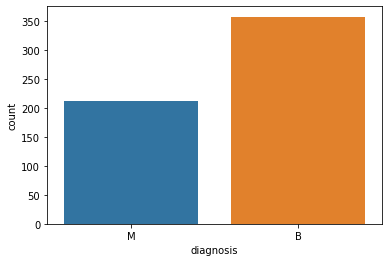

In [54]:
#ploting the diagnosis column (M & B) 
sns.countplot(df["diagnosis"], label ="count")

In [ ]:
#Idenyify data type (columuns need to be encoded)
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [56]:
#Categorical data values , iloc: location, 1 means index represent diagnosis col, while id its index is zero
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,1].values)
#diagnosis col show values in M and B array
df.iloc[:,1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [58]:
#replace data values (diagnosis col, M and B) into encoding values (0 and 10
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()

#printing encode values
labelencoder_Y.fit_transform(df.iloc[:,1].values)

# 1 replace M and 0 replace B

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [60]:
#return back the encode values into our dataframe
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [61]:
#verification_1
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [62]:
#verification_2 , only using index 1 (diagnosis column)
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

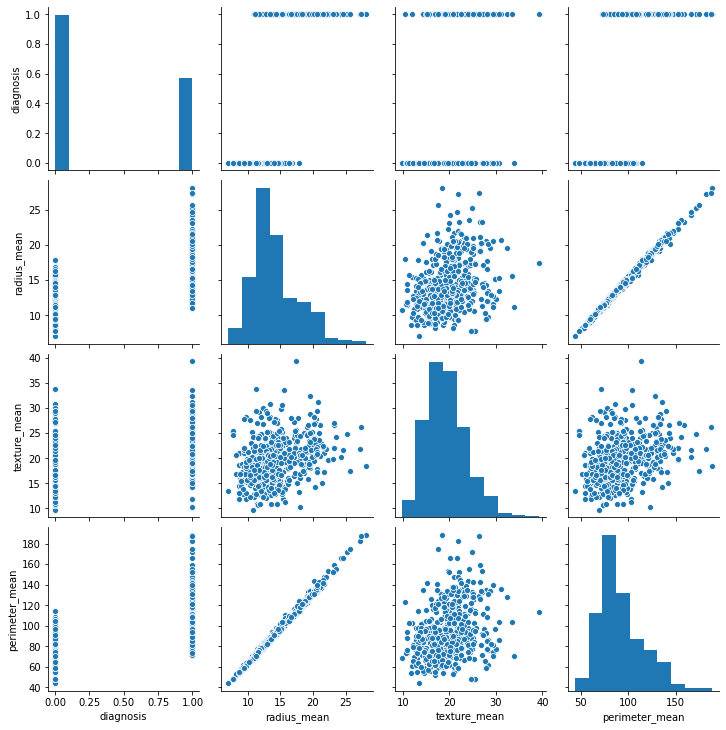

In [ ]:
#visualize df with a pair plot (: means all rows of index 1 to 5) but not including index 5
sns.pairplot(df.iloc[:,1:5])

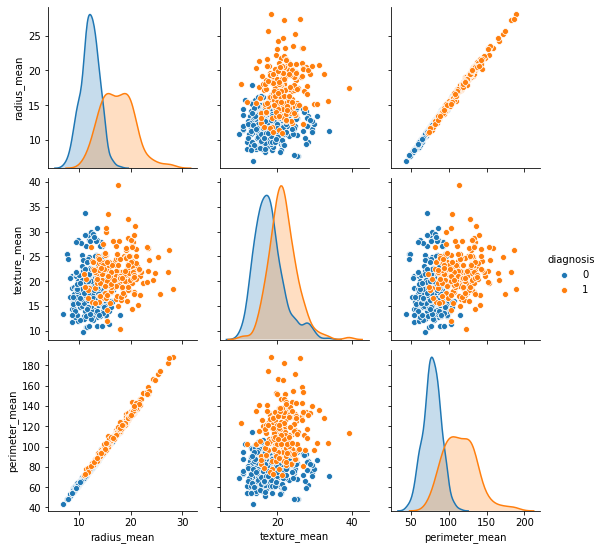

In [ ]:
#make more colorful
sns.pairplot(df.iloc[:,1:5], hue = "diagnosis")

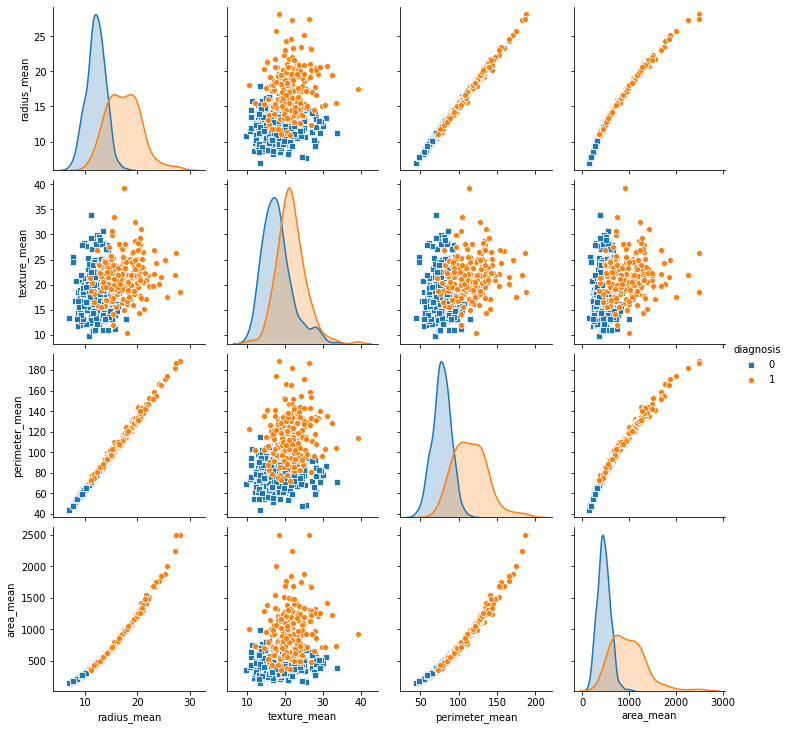

In [ ]:
#make more colorful with makers (o,s, or D)
sns.pairplot(df.iloc[:,1:6], hue = "diagnosis", markers= ["s","o"])

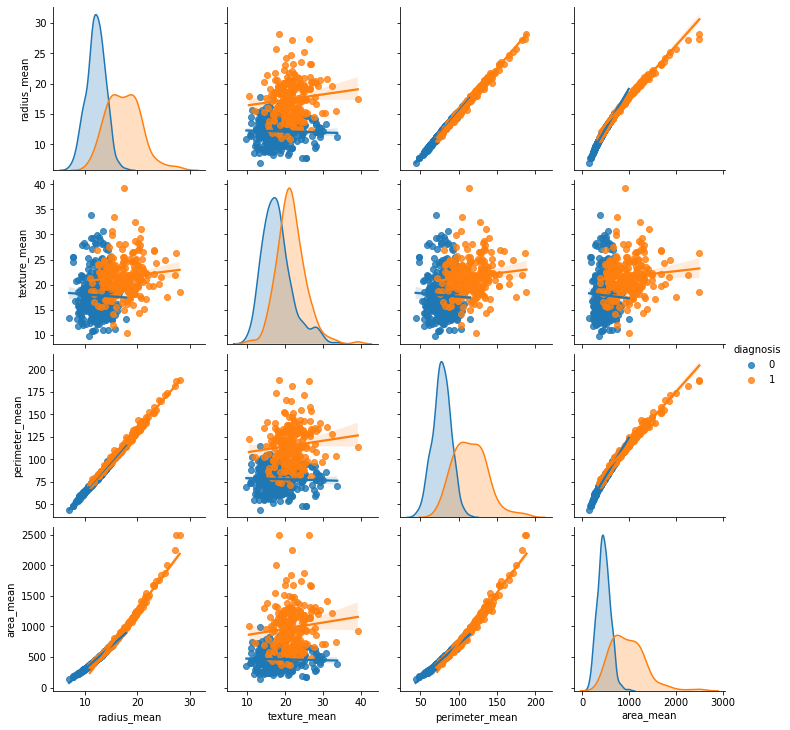

In [ ]:
#make more colorful with regression
sns.pairplot(df.iloc[:,1:6], hue = "diagnosis", kind="reg")

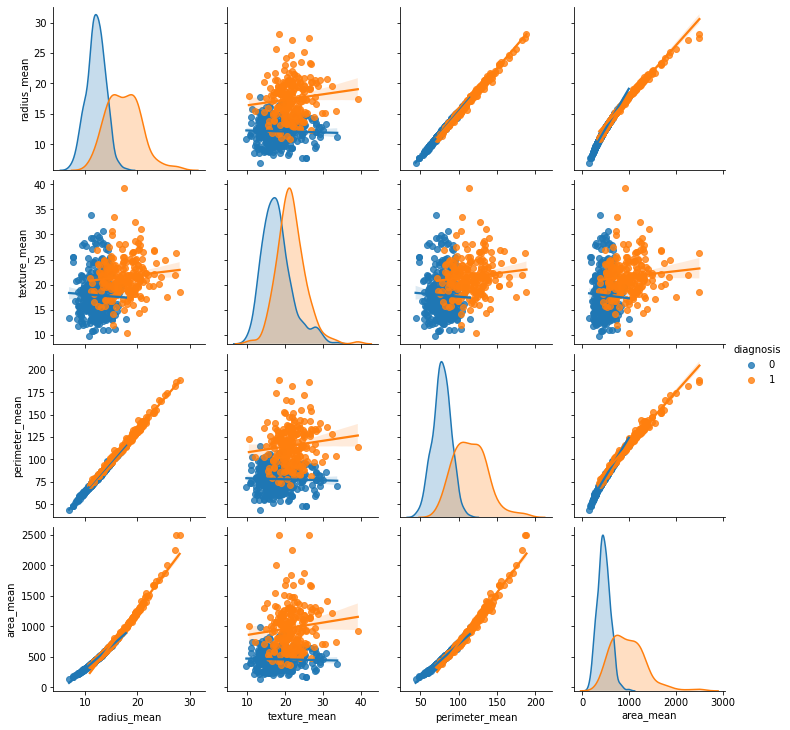

In [ ]:
#correlation with regression among data
sns.pairplot(df.iloc[:,1:6], hue = "diagnosis", kind="reg", diag_kind="kde")

In [63]:
#correlation between columns
df.iloc[:, 1:10]. corr()

#ouput: one colmn can influence another 
#i.e area_mean with 0.708984 has a positive influence to diagnosis
#    textture_mean with  -0.023389 has a negative correlation to smoothness_mean


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000


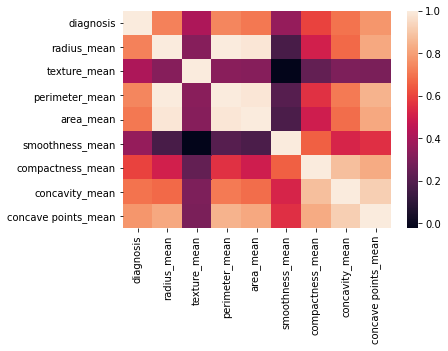

In [ ]:
#visualize the correlation with heatmap
sns.heatmap(df.iloc[:, 1:10]. corr())

In [64]:
#correlation of all df
df.iloc[:,1:33].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


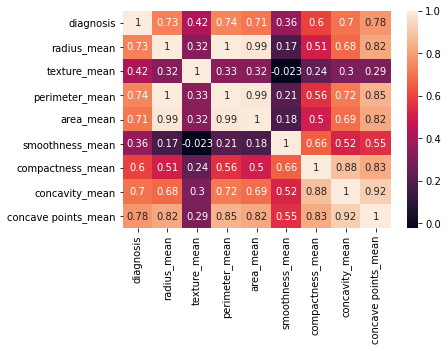

In [ ]:
#add values in heatmap for more clear
#visualize the correlation with heatmap from index 1 to 10 but excluded index 10
sns.heatmap(df.iloc[:, 1:10]. corr(), annot= True)

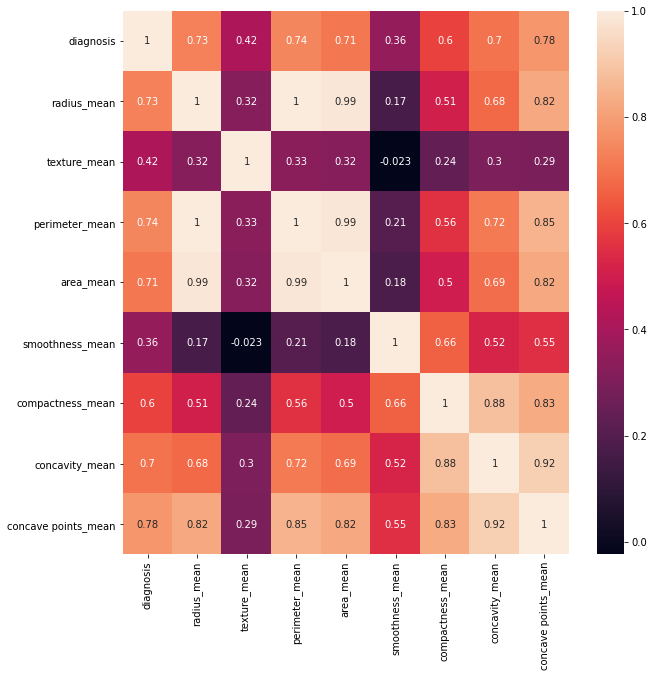

In [ ]:
#change the cell size for easier differentiate correlation values
plt.figure(figsize = (10,10))
sns.heatmap(df.iloc[:, 1:10]. corr(), annot= True)

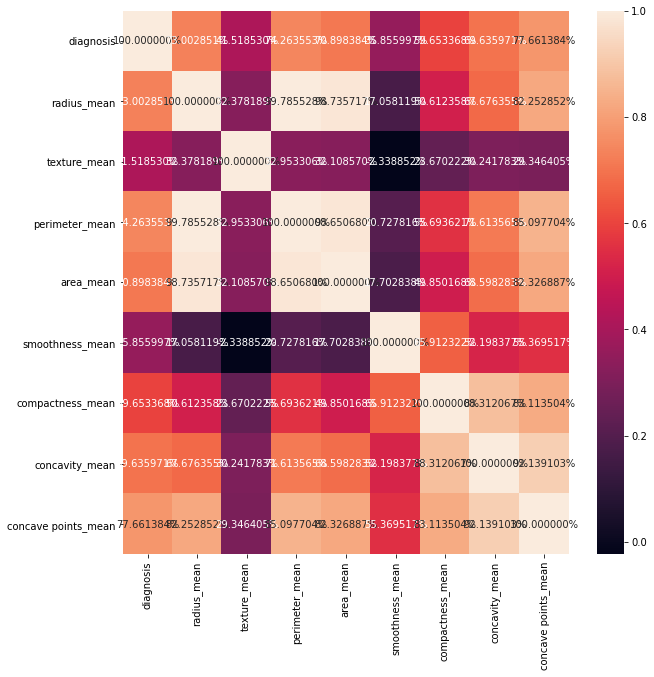

In [ ]:
#change the correlation values into percentage
plt.figure(figsize = (10,10))
sns.heatmap(df.iloc[:, 1:10]. corr(), annot= True, fmt = "0%")

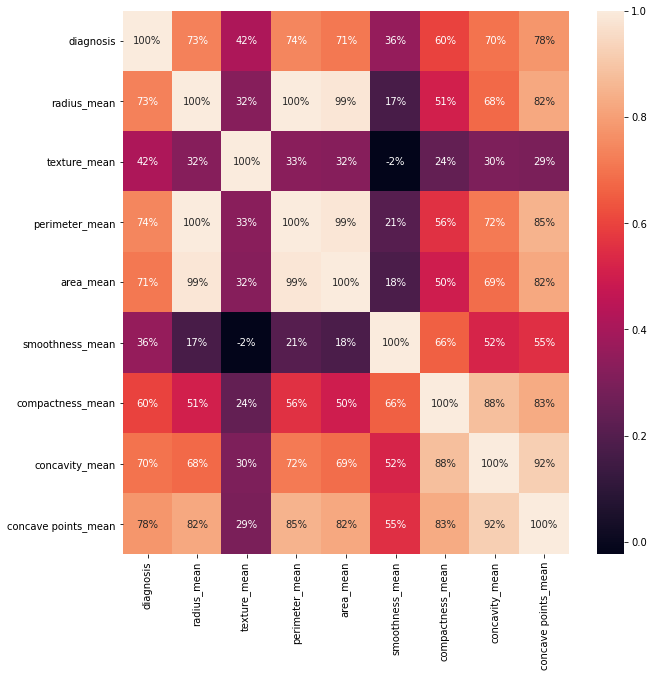

In [ ]:
#change the correlation values into percentage
plt.figure(figsize = (10,10))
sns.heatmap(df.iloc[:, 1:10]. corr(), annot= True, fmt = ".0%")

In [66]:
#create a model to detect cancer cells
#set data set as independent (X) and dependent (y)
X = df.iloc[:,2:31].values
y = df.iloc[:,1].values

In [67]:
#check datatypes , its array under numpy
type(X)

#before was df
type(df)

pandas.core.frame.DataFrame

In [68]:
# y (dependent) has the diagnosis will help us to determine if patient has cancer or not
# X (idenpendent) has features will help us to determine if patient has cancer or not based on features
# we use 25% testing and 75% training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)  

In [69]:
#feature scaling (scale the data), using X which represent feautures data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#you can print the data values
print(X_train)

[[-0.65079907 -0.43057322 -0.68024847 ... -0.69592933 -0.36433881
   0.32349851]
 [-0.82835341  0.15226547 -0.82773762 ... -1.29277423 -1.45036679
   0.62563098]
 [ 1.68277234  2.18977235  1.60009756 ...  0.26255563  0.72504581
  -0.51329768]
 ...
 [-1.33114223 -0.22172269 -1.3242844  ... -0.78274313 -0.98806491
  -0.69995543]
 [-1.25110186 -0.24600763 -1.28700242 ... -1.36015587 -1.75887319
  -1.56206114]
 [-0.74662205  1.14066273 -0.72203706 ...  0.47201917 -0.2860679
  -1.24094654]]


In [118]:
#create models for detecton breast cancer

def models(X_train, y_train) :
  #model 1: Logisitc Regression model
  from sklearn.linear_model import LogisticRegression
  logReg = LogisticRegression(random_state = 0)
  logReg.fit(X_train, y_train)

  #model 2: Decision tree model 
  from sklearn.tree import DecisionTreeClassifier 
  Dectree = DecisionTreeClassifier(criterion = "entropy", random_state =0)
  Dectree.fit(X_train, y_train)

  #model 3: Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  Randforest =RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
  Randforest.fit(X_train, y_train) 

  #print models accuracy (training data)
  print("[0]Logistic Regression Training Accuracy :", logReg.score(X_train, y_train))
  print("[1]Decision Tree Classifier Training Accuracy:", Dectree.score(X_train, y_train))
  print("[2]Random Forest Classifier Training Accuracy:", Randforest.score(X_train, y_train))


  return logReg, Dectree, Randforest

In [119]:
  #calling all models
  model = models(X_train, y_train)

  #the best model is Decision Tree classification with 0.1

[0]Logistic Regression Training Accuracy : 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9953051643192489


In [73]:
#test our model accuracy on testing data using confusion matrix
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, model[0].predict(X_test))

print(cmatrix)

#True Positive (86),True Negative (50), False positive(4), False Negative(3)

[[86  4]
 [ 3 50]]


In [74]:
#test our model accuracy on testing data using confusion matrix
#calculating the accuracy using TP,TN,FP and FN values
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, model[0].predict(X_test))

TP = cmatrix[0][1]
TN = cmatrix[1][0]
FN = cmatrix[1][0]
FP = cmatrix[0][1]

print(cmatrix)
print("Test Accuracy =", (TP + TN)/(TP + TN + FP + FN))

#the Test Accuracy is low because we dont respect the TP and TN right position

[[86  4]
 [ 3 50]]
Test Accuracy = 0.5


In [75]:
#test our model accuracy on testing data using confusion matrix
#calculating the accuracy using TP,TN,FP and FN values
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, model[0].predict(X_test))

TP = cmatrix[0][0]
TN = cmatrix[1][1]
FN = cmatrix[1][0]
FP = cmatrix[0][1]

print(cmatrix)
print("Test Accuracy =", (TP + TN)/(TP + TN + FP + FN))

[[86  4]
 [ 3 50]]
Test Accuracy = 0.951048951048951


In [127]:
#test our model accuracy on testing data using confusion matrix
#calculating the accuracy using TP,TN,FP and FN values
#get metrics for all models accuracy
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, model[0].predict(X_test))
#cmatrix = confusion_matrix(y_test, model[1].predict(X_test))
#cmatrix = confusion_matrix(y_test, model[2].predict(X_test))

TP = cmatrix[0][0]
TN = cmatrix[1][1]
FN = cmatrix[1][0]
FP = cmatrix[0][1]

print(cmatrix)
print("Test Accuracy =", (TP + TN)/ (TP + TN + FP + FN))
print()

#TP,TN,FP and FN values showed a test accuracy of 0.95 with Logistic Regression Model

[[86  4]
 [ 3 50]]
Test Accuracy = 0.951048951048951



In [115]:
#test our model accuracy on testing data using confusion matrix
#calculating the accuracy using TP,TN,FP and FN values
#get metrics for all models accuracy
from sklearn.metrics import confusion_matrix

#cmatrix = confusion_matrix(y_test, model[0].predict(X_test))
cmatrix = confusion_matrix(y_test, model[1].predict(X_test))
#cmatrix = confusion_matrix(y_test, model[2].predict(X_test))

TP = cmatrix[0][0]
TN = cmatrix[1][1]
FN = cmatrix[1][0]
FP = cmatrix[0][1]

print(cmatrix)
print("Test Accuracy =", (TP + TN)/ (TP + TN + FP + FN))
print()

#TP,TN,FP and FN values showed a test accuracy of 0.93 with Decision Tree Classifier Model

[[83  7]
 [ 2 51]]
Test Accuracy = 0.9370629370629371



In [116]:
#test our model accuracy on testing data using confusion matrix
#calculating the accuracy using TP,TN,FP and FN values
#get metrics for all models accuracy
from sklearn.metrics import confusion_matrix

#cmatrix = confusion_matrix(y_test, model[0].predict(X_test))
#cmatrix = confusion_matrix(y_test, model[1].predict(X_test))
cmatrix = confusion_matrix(y_test, model[2].predict(X_test))

TP = cmatrix[0][0]
TN = cmatrix[1][1]
FN = cmatrix[1][0]
FP = cmatrix[0][1]

print(cmatrix)
print("Test Accuracy =", (TP + TN)/ (TP + TN + FP + FN))
print()

#TP,TN,FP and FN values showed a test accuracy of 0.96 with Random Forest Classifier Model

[[87  3]
 [ 2 51]]
Test Accuracy = 0.965034965034965



In [122]:
#other method for metrics of our three models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print( classification_report(y_test, model[0].predict(X_test)))
print(accuracy_score(y_test, model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951


In [125]:
#other method for metrics of our three models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model)):
   print("Model ", i)
   print( classification_report(y_test, model[i].predict(X_test)))
   print(accuracy_score(y_test, model[i].predict(X_test)))
   print()

Model  0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted

**Conclusion** : Based on the three models 
The Random classifier (accuracy 0.96) is the best one followed by Decision tree model with accuracy of 0.93 

In [130]:
#prediciton based on Random Forest classifier model , if patient has a cancer or not
pred = model[2].predict(X_test)
print(pred)
print()
print(y_test)

#the model is not perfect which push you to predict with the decision model

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [131]:
#prediciton based on Decision Tree model , if patient has a cancer or not
pred = model[1].predict(X_test)
print(pred)
print()
print(y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


**Conlusion** : For prediction we use the model which is higher and closer to 100% such as Random Forest Classifier (Random Decision Forests) model (Accuracy= 0.96) and we tried with Decision Tree Model (Accuracy= 0.93)